In [1]:
#Attribute information [Source]:
#1. seismic: the result of shift seismic hazard assessment in the mine working obtained by the seismic method (a — lack of hazard, b — low hazard, c — high hazard, d — danger state);
#2. seismoacoustic: the result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method;
#3. shift: information about the type of a shift (W — coal-getting, N -preparation shift);
#4. genergy: seismic energy recorded within the previous shift by the most active geophone (GMax) out of
#geophones monitoring the longwall;
#5. gpuls: a number of pulses recorded within the previous shift by GMax;
#6. gdenergy: a deviation of energy recorded within the previous shift by GMax from average energy recorded during eight previous shifts;
#7. gdpuls: a deviation of a number of pulses recorded within the previous shift by GMax from the average number of pulses recorded during eight previous shifts;
#8. ghazard: the result of shift seismic hazard assessment in the mine working obtained by the seismoacoustic method based on registration coming to from GMax only;
#9. nbumps: the number of seismic bumps recorded within the previous shift;
#10. nbumps2: the number of seismic bumps (in energy range [1⁰²,1⁰³)) registered within the previous shift;
#11. nbumps3: the number of seismic bumps (in energy range [1⁰³,1⁰⁴)) registered within the previous shift;
#12. nbumps4: the number of seismic bumps (in energy range [1⁰⁴,1⁰⁵)) registered within the previous shift;
#13. nbumps5: the number of seismic bumps (in energy range [1⁰⁵,1⁰⁶)) registered within the last shift;
#14. nbumps6: the number of seismic bumps (in energy range [1⁰⁶,1⁰⁷)) registered within the previous shift;
#15. nbumps7: the number of seismic bumps (in energy range [1⁰⁷,1⁰⁸)) registered within the previous shift;
#16. nbumps89: the number of seismic bumps (in energy range [1⁰⁸,1⁰¹⁰)) registered within the previous shift;
#17. energy: the total energy of seismic bumps registered within the previous shift;
#18. maxenergy: the maximum energy of the seismic bumps registered within the previous shift;
#19. class: the decision attribute — ‘1’ means that high energy seismic bump occurred in the next shift (‘hazardous state’), ‘0’ means that no high energy seismic bumps occurred in the next shift (‘non-hazardous state’).#

In [2]:
!pip install tabulate

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
df = pd.read_csv('seismic-bumps.csv')
df.dtypes

seismic           object
seismoacoustic    object
shift             object
genergy            int64
gpuls              int64
gdenergy           int64
gdpuls             int64
hazard            object
nbumps             int64
nbumps2            int64
nbumps3            int64
nbumps4            int64
nbumps5            int64
nbumps6            int64
nbumps7            int64
nbumps89           int64
energy             int64
maxenergy          int64
class              int64
dtype: object

In [4]:
df = df.convert_dtypes()
df.dtypes

seismic           string
seismoacoustic    string
shift             string
genergy            Int64
gpuls              Int64
gdenergy           Int64
gdpuls             Int64
hazard            string
nbumps             Int64
nbumps2            Int64
nbumps3            Int64
nbumps4            Int64
nbumps5            Int64
nbumps6            Int64
nbumps7            Int64
nbumps89           Int64
energy             Int64
maxenergy          Int64
class              Int64
dtype: object

In [5]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.tail()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0
2583,a,a,W,12750,235,-10,-10,a,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(2584, 19)

In [8]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'hazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   string
 1   seismoacoustic  2584 non-null   string
 2   shift           2584 non-null   string
 3   genergy         2584 non-null   Int64 
 4   gpuls           2584 non-null   Int64 
 5   gdenergy        2584 non-null   Int64 
 6   gdpuls          2584 non-null   Int64 
 7   hazard          2584 non-null   string
 8   nbumps          2584 non-null   Int64 
 9   nbumps2         2584 non-null   Int64 
 10  nbumps3         2584 non-null   Int64 
 11  nbumps4         2584 non-null   Int64 
 12  nbumps5         2584 non-null   Int64 
 13  nbumps6         2584 non-null   Int64 
 14  nbumps7         2584 non-null   Int64 
 15  nbumps89        2584 non-null   Int64 
 16  energy          2584 non-null   Int64 
 17  maxenergy       2584 non-null   Int64 
 18  class   

In [10]:
df['seismic'] = df['seismic'].astype("category")
df['seismoacoustic'] = df['seismoacoustic'].astype("category")
df['shift'] = df['shift'].astype("category")
df['genergy'] = df['genergy'].astype(float)
df['gpuls'] = df['gpuls'].astype(float)
df['gdenergy'] = df['gdenergy'].astype(float)
df['gdpuls'] = df['gdpuls'].astype(float)
df['hazard'] = df['hazard'].astype("category")
df['nbumps'] = df['nbumps'].astype(float)
df['nbumps2'] = df['nbumps2'].astype(float)
df['nbumps3'] = df['nbumps3'].astype(float)
df['nbumps4'] = df['nbumps4'].astype(float)
df['nbumps5'] = df['nbumps5'].astype(float)
df['nbumps6'] = df['nbumps6'].astype(float)
df['nbumps7'] = df['nbumps7'].astype(float)
df['nbumps89'] = df['nbumps89'].astype(float)
df['energy'] = df['energy'].astype(float)
df['maxenergy'] = df['maxenergy'].astype(float)
df['class'] = df['class'].astype(float)

df.dtypes

seismic           category
seismoacoustic    category
shift             category
genergy            float64
gpuls              float64
gdenergy           float64
gdpuls             float64
hazard            category
nbumps             float64
nbumps2            float64
nbumps3            float64
nbumps4            float64
nbumps5            float64
nbumps6            float64
nbumps7            float64
nbumps89           float64
energy             float64
maxenergy          float64
class              float64
dtype: object

In [11]:
categorical_columns = ['seismic','seismoacoustic','shift','hazard']

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable seismic
a    1682
b     902
Name: seismic, dtype: int64

Frequency of Categories for variable seismoacoustic
a    1580
b     956
c      48
Name: seismoacoustic, dtype: int64

Frequency of Categories for variable shift
W    1663
N     921
Name: shift, dtype: int64

Frequency of Categories for variable hazard
a    2342
b     212
c      30
Name: hazard, dtype: int64


# CATEGORICAL VARIABLES DISTRIBUTION ANALYSIS

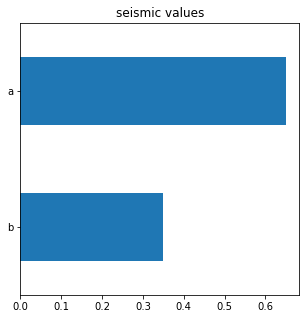

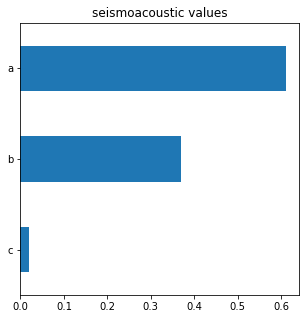

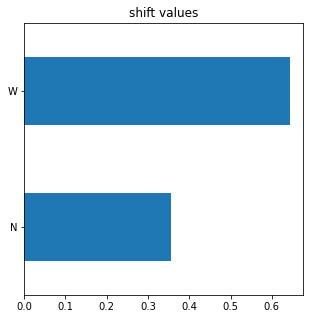

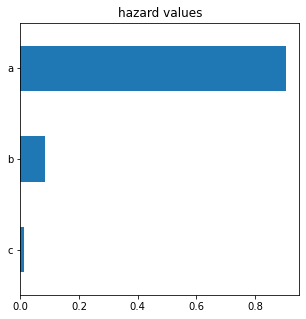

In [12]:
#overview of distributions
selected_columns = df[['seismic','seismoacoustic','shift','hazard']]
df_categorical = selected_columns.copy()
for e in df_categorical:
    df[e].value_counts(normalize=True, ascending=True).plot(kind='barh', title=f'{e} values',  figsize=(5,5))
    plt.show()

##  NUMERICAL VARIABLES DISTRIBUTION ANALYSIS

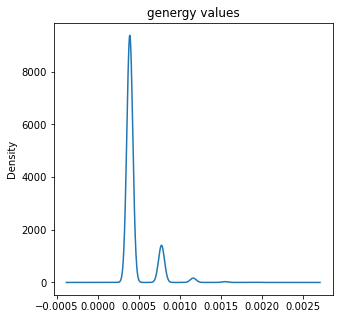

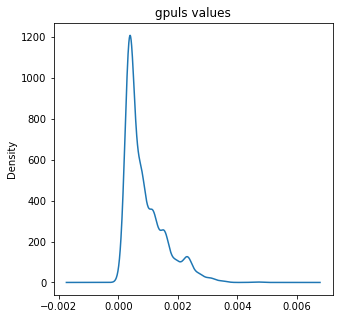

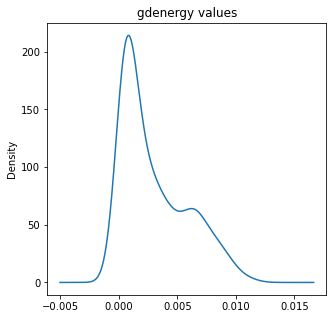

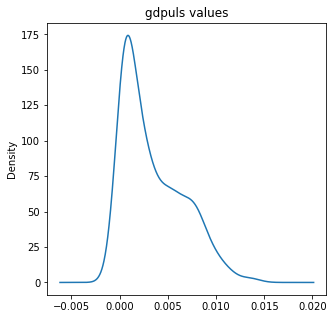

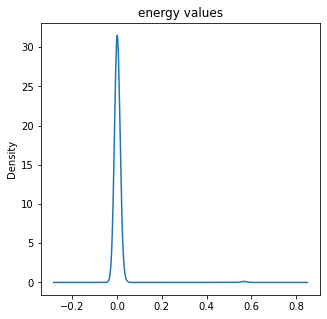

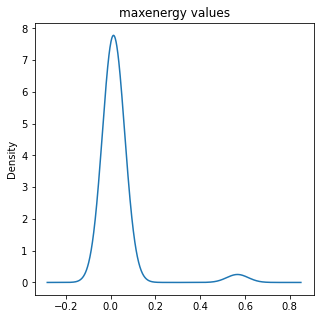

In [13]:
#overview of distributions
selected_columns = df[['genergy','gpuls','gdenergy','gdpuls', 'energy', 'maxenergy']]
df_numerical = selected_columns.copy()
for e in df_numerical:
    df[e].value_counts(normalize=True).plot(kind='density', title=f'{e} values',  figsize=(5,5))
    plt.show()

#### as we can see, the variables above assume a right skewed distribution. This means that the majority of values are located in left part, around zero.

## DISCRETE VARIABLES DISTRIBUTION ANALYSIS

array([[<AxesSubplot:title={'center':'nbumps'}>,
        <AxesSubplot:title={'center':'nbumps2'}>,
        <AxesSubplot:title={'center':'nbumps3'}>],
       [<AxesSubplot:title={'center':'nbumps4'}>,
        <AxesSubplot:title={'center':'nbumps5'}>,
        <AxesSubplot:title={'center':'nbumps6'}>],
       [<AxesSubplot:title={'center':'nbumps7'}>,
        <AxesSubplot:title={'center':'nbumps89'}>, <AxesSubplot:>]],
      dtype=object)

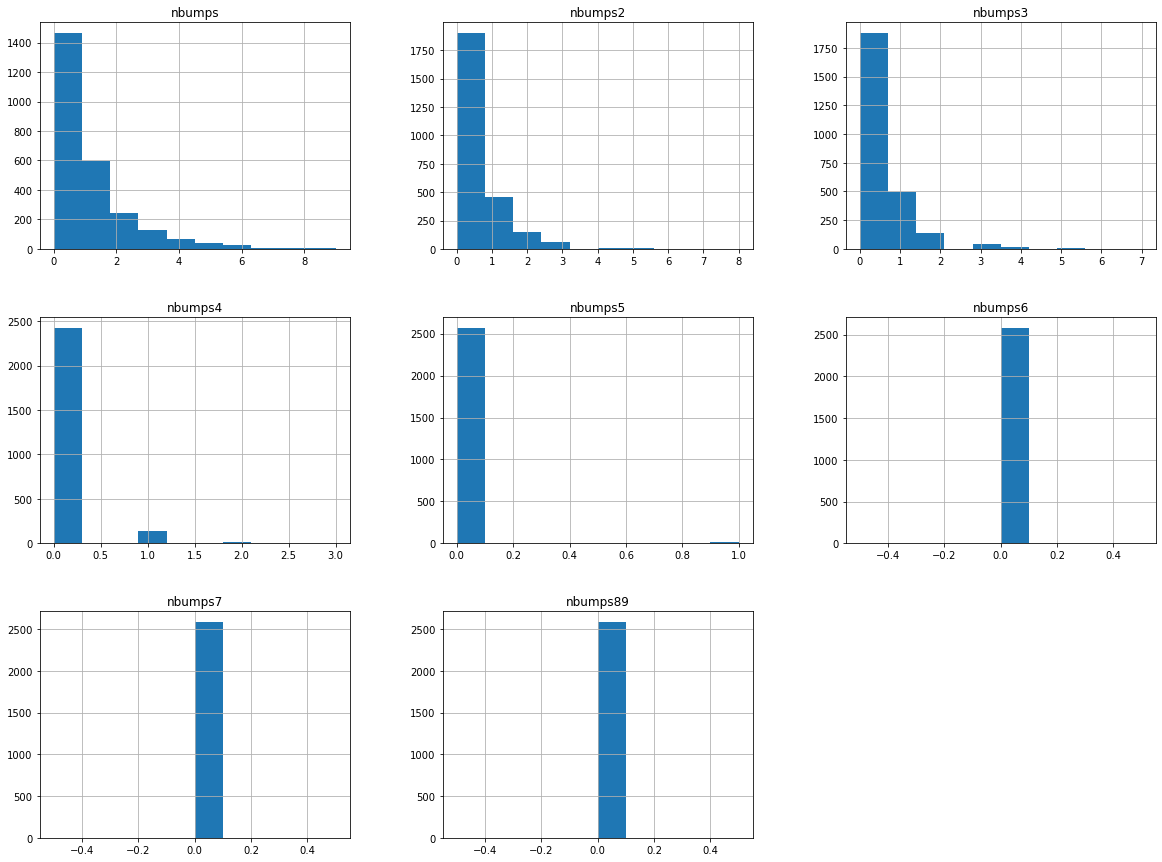

In [14]:
#overview of distributions
selected_columns = df[['nbumps','nbumps2','nbumps3','nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']]
df_discrete = selected_columns.copy()
df_discrete.hist(figsize=(20,15))

## DECISION VARIABLE

<AxesSubplot:xlabel='class', ylabel='count'>

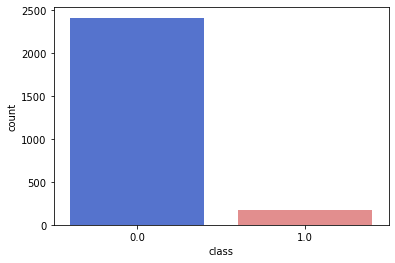

In [15]:
#df['class'].value_counts(normalize=True, ascending=True).plot(kind='barh', title='class values', colors=['#BB0000', '#0000BB'])

sns.countplot(x=df['class'], palette={0:'royalblue',1:'lightcoral'} )

In [16]:
df['class'].value_counts()  #in numero

0.0    2414
1.0     170
Name: class, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
genergy,2584.0,90242.523220,229200.508894,100.0,11660.0,25485.0,52832.50,2595650.0
gpuls,2584.0,538.579334,562.652536,2.0,190.0,379.0,669.00,4518.0
gdenergy,2584.0,12.375774,80.319051,-96.0,-37.0,-6.0,38.00,1245.0
gdpuls,2584.0,4.508901,63.166556,-96.0,-36.0,-6.0,30.25,838.0
nbumps,2584.0,0.859520,1.364616,0.0,0.0,0.0,1.00,9.0
nbumps2,2584.0,0.393576,0.783772,0.0,0.0,0.0,1.00,8.0
nbumps3,2584.0,0.392802,0.769710,0.0,0.0,0.0,1.00,7.0
nbumps4,2584.0,0.067724,0.279059,0.0,0.0,0.0,0.00,3.0
nbumps5,2584.0,0.004644,0.068001,0.0,0.0,0.0,0.00,1.0
nbumps6,2584.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [18]:
df.groupby('class').mean().T

class,0.0,1.0
genergy,82448.918807,200911.705882
gpuls,508.567109,964.752941
gdenergy,12.312759,13.270588
gdpuls,4.143745,9.694118
nbumps,0.769677,2.135294
nbumps2,0.351698,0.988235
nbumps3,0.350870,0.988235
nbumps4,0.062138,0.147059
nbumps5,0.004557,0.005882
nbumps6,0.000000,0.000000


In [19]:
df.isnull().any()  # nessun true quindi nessun valore mancante

seismic           False
seismoacoustic    False
shift             False
genergy           False
gpuls             False
gdenergy          False
gdpuls            False
hazard            False
nbumps            False
nbumps2           False
nbumps3           False
nbumps4           False
nbumps5           False
nbumps6           False
nbumps7           False
nbumps89          False
energy            False
maxenergy         False
class             False
dtype: bool

In [20]:
confusion_matrix = pd.crosstab(df['seismic'], df['class'])
confusion_matrix

class,0.0,1.0
seismic,,
a,1599,83
b,815,87


## LOG TRANSFORMED HISTPLOTS

<AxesSubplot:xlabel='genergy', ylabel='Density'>

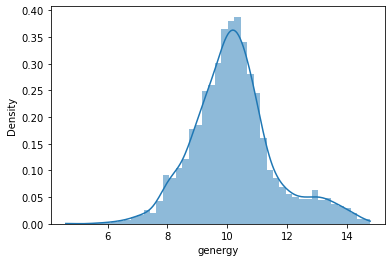

In [21]:
sns.histplot(np.log(df['genergy']), kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='gpuls', ylabel='Density'>

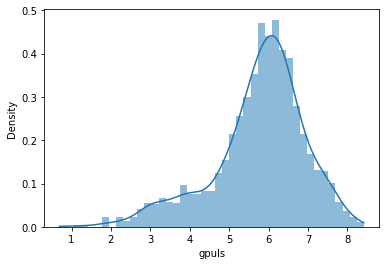

In [22]:
sns.histplot(np.log(df['gpuls']), kde=True, stat="density", linewidth=0)

In [23]:
df_corr = df.corr() # assegno a una variabile per usarla alla ricerca dei nan nella correlazione

In [24]:
nan_df = df_corr[df_corr.isna().any(axis=1)]  #1 per colonne e 0 per righe
nan_df.head()   # tutte le colonne con un valore nan nella correlazione (le prime sono date dalle righe delle colonne tolte)


,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,NaN,NaN,NaN,0.080828,0.064405,0.128160
gpuls,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,NaN,NaN,NaN,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,NaN,NaN,NaN,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,NaN,NaN,NaN,0.143277,0.143646,0.021788
nbumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,NaN,NaN,NaN,0.347852,0.273714,0.248144


In [25]:
print(df['nbumps6'].value_counts())
print(df['nbumps7'].value_counts())
print(df['nbumps89'].value_counts())

0.0    2584
Name: nbumps6, dtype: int64
0.0    2584
Name: nbumps7, dtype: int64
0.0    2584
Name: nbumps89, dtype: int64


### as seen before with the histograms, nbumps6, nbumps7 and nbumps89 contain only zero, so they can be dropped

In [26]:
df = df.drop('nbumps6', 1) 
df = df.drop('nbumps7', 1) 
df = df.drop('nbumps89', 1) 
df.head() 
df.tail(100) # per vedere se il 2 ha qualche numero


,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
2484,a,a,W,11740.0,278.0,-47.0,-25.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2485,a,a,W,8160.0,148.0,-51.0,-57.0,a,1.0,1.0,0.0,0.0,0.0,300.0,300.0,0.0
2486,a,a,W,11890.0,475.0,23.0,10.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2487,a,a,W,10080.0,349.0,11.0,40.0,a,1.0,0.0,1.0,0.0,0.0,3000.0,3000.0,0.0
2488,a,a,W,8620.0,239.0,-58.0,-31.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410.0,785.0,432.0,151.0,b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2580,b,a,W,42110.0,555.0,213.0,118.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2581,b,a,W,26960.0,540.0,101.0,112.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,a,a,W,16130.0,322.0,2.0,2.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NBUMPS CROSSTAB

### Since bumps are the number of seismic bumps recorded within the previous shift, it makes sense to check the entity of these bumps, so in which class they fall (0 = non hazardous; 1 = hazardous). We can check it with a crosstab

In [27]:
bumps_col = ['nbumps','nbumps2','nbumps3','nbumps4','nbumps5'] #to do that I select only the significant nbumps

In [28]:
for col in bumps_col:
    bumps_crosstab = pd.crosstab(df[col], df['class'], colnames=['class'], margins = True) #margins is to add the totals
    print(bumps_crosstab)
    print('-----')

class    0.0  1.0   All
nbumps                 
0.0     1424   40  1464
1.0      567   31   598
2.0      208   37   245
3.0       96   31   127
4.0       59   10    69
5.0       30    8    38
6.0       19    9    28
7.0        3    2     5
8.0        6    1     7
9.0        2    1     3
All     2414  170  2584
-----
class     0.0  1.0   All
nbumps2                 
0.0      1832   69  1901
1.0       399   56   455
2.0       122   29   151
3.0        47   11    58
4.0         8    4    12
5.0         5    1     6
8.0         1    0     1
All      2414  170  2584
-----
class     0.0  1.0   All
nbumps3                 
0.0      1806   73  1879
1.0       442   55   497
2.0       115   25   140
3.0        35    7    42
4.0        12    8    20
5.0         3    2     5
7.0         1    0     1
All      2414  170  2584
-----
class     0.0  1.0   All
nbumps4                 
0.0      2278  148  2426
1.0       123   20   143
2.0        12    1    13
3.0         1    1     2
All      2414  170  

### Crosstab with the percentages, to better see the percentage of 0s in comparison to the 1s

In [29]:
for col in bumps_col:
    bumps_crosstab = pd.crosstab(df[col], df['class'], colnames=['class'], margins = True).apply(lambda r: r/r.sum(), axis = 1) #margins is to add the totals
    print(bumps_crosstab)
    print('-----')

class        0.0       1.0  All
nbumps                         
0.0     0.486339  0.013661  0.5
1.0     0.474080  0.025920  0.5
2.0     0.424490  0.075510  0.5
3.0     0.377953  0.122047  0.5
4.0     0.427536  0.072464  0.5
5.0     0.394737  0.105263  0.5
6.0     0.339286  0.160714  0.5
7.0     0.300000  0.200000  0.5
8.0     0.428571  0.071429  0.5
9.0     0.333333  0.166667  0.5
All     0.467105  0.032895  0.5
-----
class         0.0       1.0  All
nbumps2                         
0.0      0.481852  0.018148  0.5
1.0      0.438462  0.061538  0.5
2.0      0.403974  0.096026  0.5
3.0      0.405172  0.094828  0.5
4.0      0.333333  0.166667  0.5
5.0      0.416667  0.083333  0.5
8.0      0.500000  0.000000  0.5
All      0.467105  0.032895  0.5
-----
class         0.0       1.0  All
nbumps3                         
0.0      0.480575  0.019425  0.5
1.0      0.444668  0.055332  0.5
2.0      0.410714  0.089286  0.5
3.0      0.416667  0.083333  0.5
4.0      0.300000  0.200000  0.5
5.0      0.

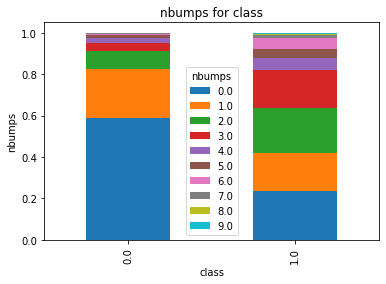

In [30]:
pclass_xt = pd.crosstab(df['class'], df['nbumps'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)  #li trasformo in modo che il valore vada da 0 a 1
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='nbumps for class')
plt.xlabel('class')
plt.ylabel('nbumps')
plt.show()

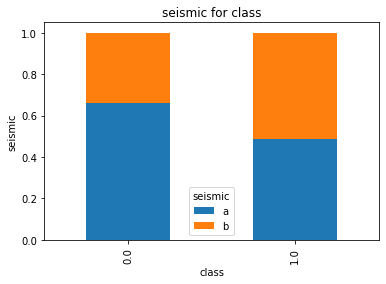

In [31]:
classandseismic = pd.crosstab(df['class'], df['seismic'])
classandseismic = classandseismic.div(classandseismic.sum(1).astype(float), axis=0)
classandseismic.plot(kind='bar', stacked=True, 
                   title='seismic for class')
plt.xlabel('class')
plt.ylabel('seismic')
plt.show()

In [32]:
classnbumps2=pd.crosstab(df['class'], df['nbumps2'])   #trasformo le crosstab in valori da 1 a 0
classnbumps3=pd.crosstab(df['class'], df['nbumps3'])
classnbumps4 = pd.crosstab(df['class'], df['nbumps4'])
classnbumps5= pd.crosstab(df['class'], df['nbumps5'])
classnbumps2=classnbumps2.div(classnbumps2.sum(1).astype(float), axis=0)
classnbumps3=classnbumps3.div(classnbumps3.sum(1).astype(float), axis=0)
classnbumps4=classnbumps4.div(classnbumps4.sum(1).astype(float), axis=0)
classnbumps5=classnbumps5.div(classnbumps5.sum(1).astype(float), axis=0)


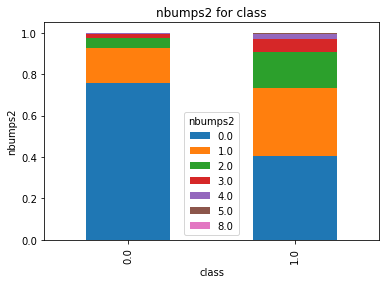

In [33]:
classnbumps2.plot(kind='bar', stacked=True, 
                   title='nbumps2 for class')
plt.xlabel('class')
plt.ylabel('nbumps2')
plt.show()

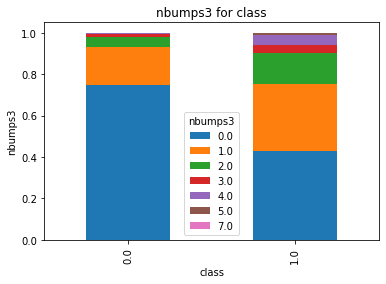

In [34]:
classnbumps3.plot(kind='bar', stacked=True, 
                   title='nbumps3 for class')
plt.xlabel('class')
plt.ylabel('nbumps3')
plt.show()

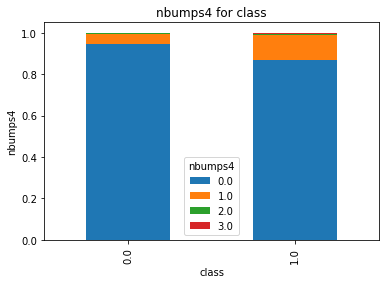

In [35]:
classnbumps4.plot(kind='bar', stacked=True, 
                   title='nbumps4 for class')
plt.xlabel('class')
plt.ylabel('nbumps4')
plt.show()

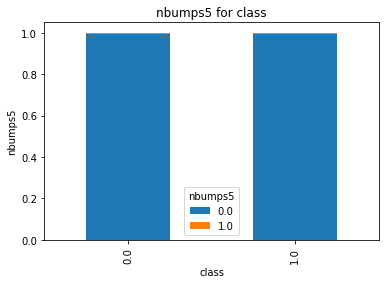

In [36]:
classnbumps5.plot(kind='bar', stacked=True, 
                   title='nbumps5 for class')
plt.xlabel('class')
plt.ylabel('nbumps5')
plt.show()

#### the crosstab highlight that the majority of bumps - also the ones which registered an energy intensity in the upperbound of the range - have been classified as 'non-harzardous state', since belonging to the class 0. 

## CORRELATION AND HEATMAP

In [37]:
df.corr() #vedo correlazione senza valori inutili

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
genergy,1.000000,0.748020,0.048514,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,0.080828,0.064405,0.128160
gpuls,0.748020,1.000000,0.293036,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,0.187350,0.164263,0.201042
gdenergy,0.048514,0.293036,1.000000,0.811944,0.030039,0.041246,-0.012189,0.036916,0.123229,0.105971,0.108572,0.002957
gdpuls,0.071554,0.382906,0.811944,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,0.143277,0.143646,0.021788
nbumps,0.220720,0.300923,0.030039,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,0.347852,0.273714,0.248144
nbumps2,0.143587,0.207390,0.041246,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,0.124650,0.085032,0.201381
nbumps3,0.191753,0.225695,-0.012189,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,0.244083,0.176480,0.205327
nbumps4,0.150589,0.256547,0.036916,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,0.489828,0.416483,0.075458
nbumps5,-0.009863,0.049450,0.123229,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,0.773605,0.808406,0.004834
energy,0.080828,0.187350,0.105971,0.143277,0.347852,0.124650,0.244083,0.489828,0.773605,1.000000,0.989547,0.058431


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'genergy'),
  Text(0, 1.5, 'gpuls'),
  Text(0, 2.5, 'gdenergy'),
  Text(0, 3.5, 'gdpuls'),
  Text(0, 4.5, 'nbumps'),
  Text(0, 5.5, 'nbumps2'),
  Text(0, 6.5, 'nbumps3'),
  Text(0, 7.5, 'nbumps4'),
  Text(0, 8.5, 'nbumps5'),
  Text(0, 9.5, 'energy'),
  Text(0, 10.5, 'maxenergy'),
  Text(0, 11.5, 'class')])

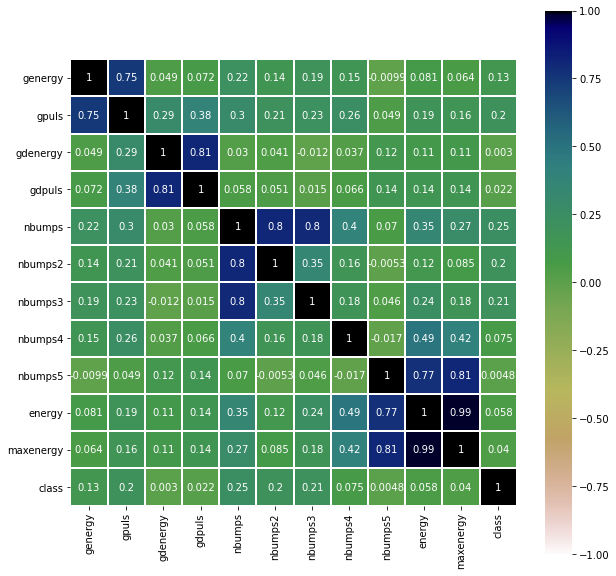

In [38]:
dfcorrelazione = df.corr()
plt.figure(figsize=[10, 10])
sns.heatmap(data=dfcorrelazione, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

## SCATTER PLOTS

<AxesSubplot:xlabel='energy', ylabel='gpuls'>

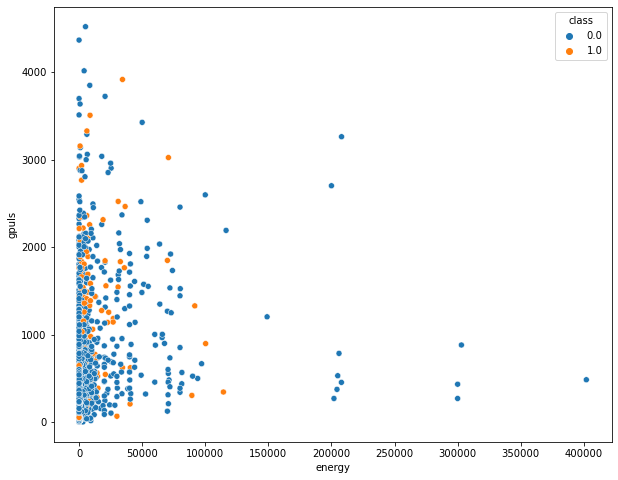

In [39]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='energy', y='gpuls', hue='class', data=df)

### To better analyse the correlation we apply a log transformation to the columns genergy and gpuls

In [40]:
df['log_genergy'] = np.log(df['genergy']) #we don't use the variable 'energy' because it contains zero values so the log transformation cannot be done
df['log_gpuls'] = np.log(df['gpuls'])

<AxesSubplot:xlabel='log_genergy', ylabel='log_gpuls'>

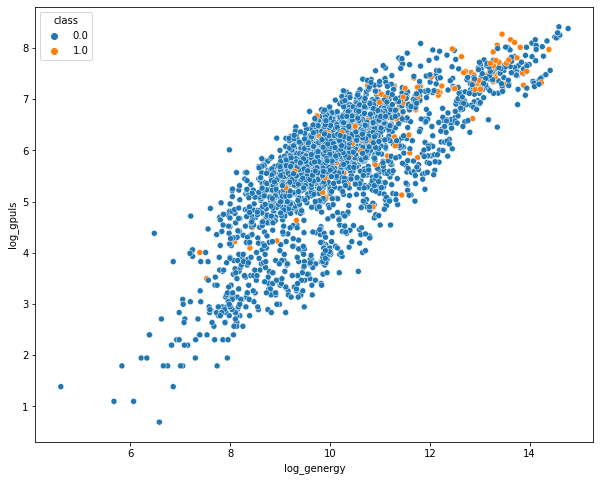

In [41]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_genergy', y='log_gpuls', hue='class', data=df)

#### After applying the log transf we can better see a positive correlation between gpuls and genergy. That could indicate that the number of puls increases when the energy does, so the number of pulse can be used as and indicator of the energy intensity. (The pulses have been registered by the most active geophone (Gmax), which is a sensor designed to detect ground movements).


<AxesSubplot:xlabel='gdenergy', ylabel='gdpuls'>

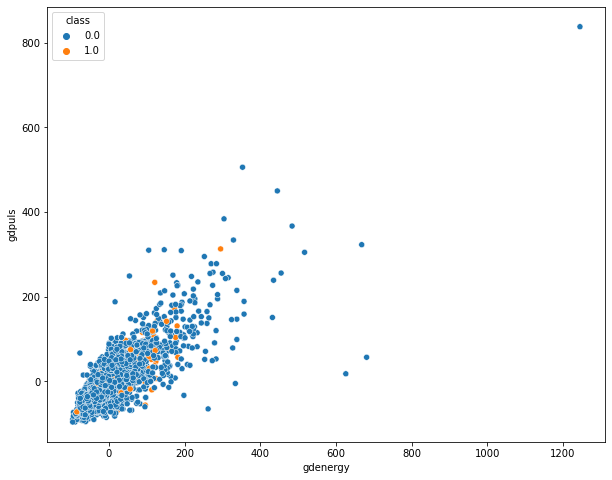

In [42]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', hue='class', data=df)

In [43]:
# sembrerebbe esserci correlazione, con una trasformazione sarebbe più semplice vederla (?). ho cercato altre trasformazioni e ho trovato Square Root Method, ma non sono riuscita ad applicarlo. 

## Inconsistency check

In [61]:
df_discrete = df_discrete.drop('nbumps', 1)
df_total = df_discrete.sum(axis=1)
df_nbumps_inconsistency = pd.DataFrame({'nbumps': df['nbumps'], 'total_nbumps': df_discrete.sum(axis=1)})

for index, row in df_nbumps_inconsistency.iterrows():
    if row['nbumps'] != row['total_nbumps']:
        print(index, row['nbumps'], row['total_nbumps'])
        df = df.drop(index)

436 2.0 1.0
437 1.0 0.0


In [65]:
df.shape

(2582, 18)